### Question 1: Identify the glass type (70)

Following is a data about the glass. Each observation represents one glass with its type and corresponding oxide content. There are 6 types of glass in the data.

In [1]:
import pandas as pd
df = pd.read_csv('glass.csv')

In [2]:
df.head()

,ID,Rl,Na,Mg,Al,Si,K,Ca,Ba,Fe,type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
df.isnull().sum()

ID      0
Rl      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
type    0
dtype: int64

In [4]:
df.shape

(214, 11)

In [5]:
df.describe(include='all')

,ID,Rl,Na,Mg,Al,Si,K,Ca,Ba,Fe,type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [6]:
df['type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: type, dtype: int64

1. Split the training and test data. Fit a decision tree and plot it. (10)

In [7]:
y=df['type']
X = df.drop(columns=['type','ID'])

In [8]:
X

,Rl,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [9]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5220)

clf = DecisionTreeClassifier(random_state=5200)

clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=5200)

In [10]:
X.columns = X.columns.astype(str)
y1 = y.astype(str)

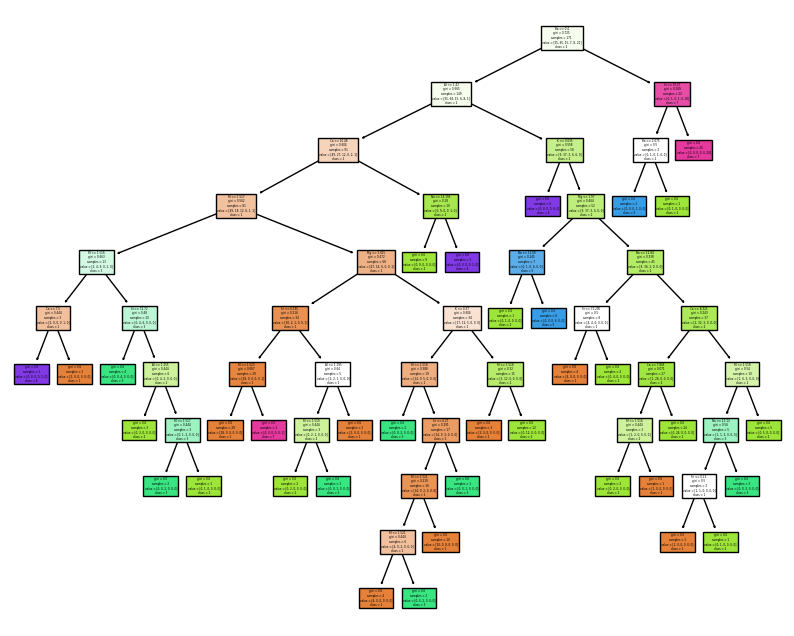

In [11]:


# Plot the decision tree
plt.figure(figsize=(10, 8))
plot_tree(clf, feature_names=X.columns, class_names=list(y1.unique()), filled=True)
plt.show()



2. Pruning the tree with parameter ccp_alpha. Plot the best tree. Print the best parameter and accuracy. Note: remember to split the training data into training and validation. You can choose the alpha from 0.01 to 10, and ignore the warning message. (20)

In [12]:
from sklearn.model_selection import GridSearchCV
import numpy as np
import warnings
warnings.filterwarnings("ignore")

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,
                                                    test_size=0.2,
                                                    random_state=5220)

clf = DecisionTreeClassifier(random_state=4400)

# Define a range of ccp_alpha values
alpha_values = np.linspace(0.01, 10,20)

# Perform GridSearchCV to find the best ccp_alpha
param_grid = {'ccp_alpha': alpha_values}
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_valid, y_valid)

# Get the best ccp_alpha and best estimator
best_alpha = grid_search.best_params_['ccp_alpha']
best_clf = grid_search.best_estimator_

# Print the best parameter and accuracy
print(f"Best ccp_alpha: {best_alpha}")
print(f"Best training accuracy: {grid_search.best_score_}")

Best ccp_alpha: 0.01
Best training accuracy: 0.6857142857142857


3. Fit an Adaboost model. Set the n_estimator equal to 100. Print the accuracy. (10)

In [13]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4400)

# Create an AdaBoost classifier
clf = AdaBoostClassifier(n_estimators=100, random_state=4400)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")



Accuracy: 0.47


4. Fit a random forest model. Tune the parameters 'n_estimators', 'max_depth', 'min_samples_leaf' and 'max_features', Print the accuracy and show the variable important plot. (20)

In [14]:
from sklearn.ensemble import RandomForestClassifier
# Create and fit a Random Forest classifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5220)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,
                                                    test_size=0.2,
                                                    random_state=5220)

In [15]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50,125, 150,175],
    'max_depth': [5,7,8, 10, 15],
    'min_samples_leaf': [1, 2,3, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [16]:

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=4400)

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_valid, y_valid)

# Get the best hyperparameters and best estimator
best_params = grid_search.best_params_
best_rf_classifier = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params)


test_accuracy = accuracy_score(y_test, best_rf_classifier.predict(X_test))
print(f"Test Accuracy: {test_accuracy:.2f}")


Best Hyperparameters:
{'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 3, 'n_estimators': 50}
Test Accuracy: 0.53


In [17]:
importances = best_rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort in descending order



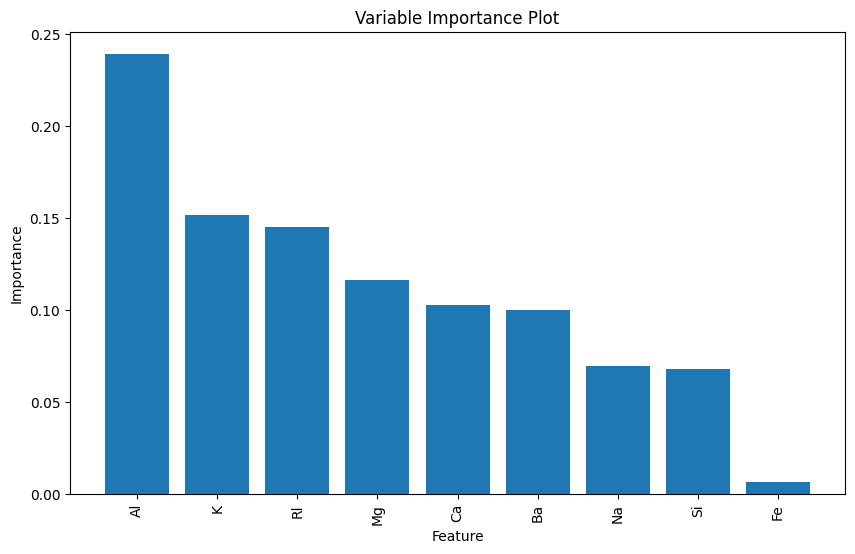

In [18]:
# Plotting the variable importances
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Variable Importance Plot")
plt.show()


In [19]:
X.columns

Index(['Rl', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], dtype='object')

In [20]:
importances[indices]

array([0.23927186, 0.15184643, 0.14536016, 0.11631168, 0.10271593,
       0.10022252, 0.06972428, 0.06811068, 0.00643647])

5. Fit another decision tree with the most three important features. Plot the decision tree and print the accuracy. (10)

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = X[X.columns[:3]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
dt_classifier = DecisionTreeClassifier()

# Train the classifier on the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7209302325581395


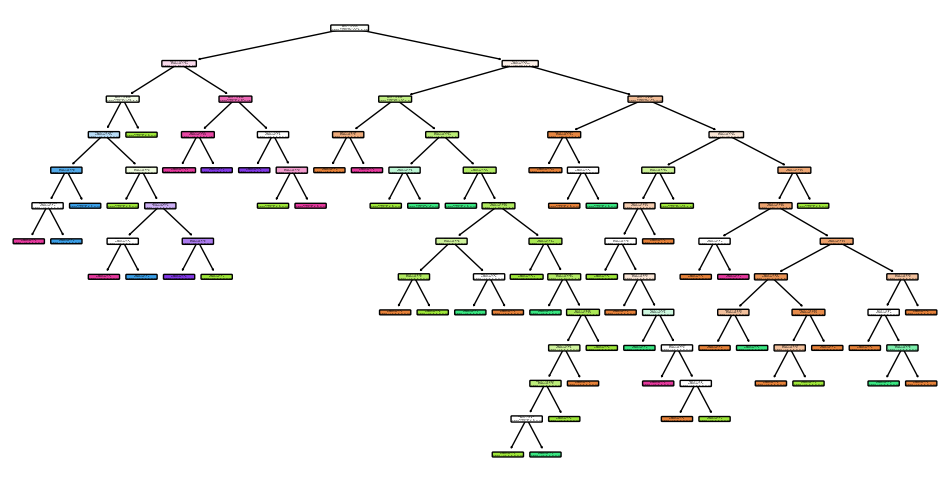

In [22]:
# Plot the Decision Tree
plt.figure(figsize=(12, 6))

plot_tree(dt_classifier, feature_names=X.columns[:3], filled=True, rounded=True)
plt.show()

### Question 2: Models comparison (30)

1. List a couple of characteristics that may lead you to consider using random forest. (Data size, features, etc. )

A few charcateristics that can lead us to consider using Random Forest are:
1)Large datasets.  Random Forest trains on subsets of the data (bagging) and use multiple trees for prediction makes it scalable to large datasets.
2)High-Dimensional Data: Random Forest can handle datasets with a large number of features (high-dimensional data) without overfitting.
3)When we have missing data-it can handle datasets with missing values without the need for extensive imputation,providing meaningful interpretations.
4)Feature Importance:It measures  feature importance, indicating  the contribution of each feature to the model's predictive performance. This information is valuable for understanding the impact of different features on the target variable.
5)Balancing Bias and Variance:  It balances well between bias and variance. While individualdecision trees might have high variance, the ensemble average tends to reduce overfitting(low variance), resulting in a model that generalizes well to unseen data.
6)Complex Relationships and Non-Linearity:
Non-Linear Relationships: Random Forest is capable of capturing complex non-linear relationships in the data. It can model intricate decision boundaries and interactions between features, making it suitable for datasets with non-linear relationships.
Ensemble of Trees: By aggregating the predictions of multiple decision trees, Random Forest can improve the overall predictive performance and capture diverse patterns in the data.

2. Compare the differences between Logistics regression and Random forest.

1)Logistics Regression(LR) is used for binary classification whereas Random forest(RF) can be used for both classification and regression.
2)Handling Outliers and Noise-
LR- is more sesnsitive to outliers as it minimises sum of squared errors. It can be impacted by noise in data.
RF- is more robust to outliers and and noise due to aggragating effect of multiple decision trees.
3)Computational Complexity:
LR- Computationally less expensive.
RF-Can be more computationally expensive, especially with a large number of trees.Although, parallelization can be leveraged for faster training.
4)Hyperparameter Tuning:is more in random forest(such as number of trees, maximum depth, and minimum samples per leaf).LR has less parameters to tune.
5)Random forest is an ensemble method, having multiple decision trees leading to improvised results and generalization, whereas LR is a single model.
6)Data Size-LR works well with small-moderate dataset whereas RF works well on large datasets as it is more scalable due to parallelization during the training of individual trees.
7)LR assumes a linear relationship between features and the log-odds, which may not capture complex non-linear patterns in the data, whereas RF can capture non-linear relationships and complex interactions between features due to its ensemble of decision trees.
8)Interpretability:
Logistic Regression: The coefficients in logistic regression provide direct information about the impact of each feature on the predicted probability. It is more interpretable.
Random Forest: While feature importances can be obtained, the individual decision trees in a Random Forest can be complex, making it harder to interpret compared to logistic regression.
9)RF is more complicated than LR.

3. Explain why Random Forest is called "random forest"?

It is called a Random Forest because we use Random subsets of data and features and we end up building a Forest of many decision trees in a random manner.Randomness is introduced at two key levels:

Random Subsampling of Data (Bootstrapping):
Each tree in the forest is built using a subset of the training data. This is achieved through bootstrapping, which involves randomly sampling with replacement from the original dataset. As a result, some instances may be repeated in the subset, and others may be left out. This process introduces diversity among the trees.
Random Subset of Features:
When splitting nodes in each decision tree, instead of considering all features, a random subset of features is selected. This helps prevent certain features from dominating the decision-making process. The number of features in the subset is a hyperparameter and is often denoted as "max_features."

The combination of these two sources of randomness—bootstrapping and feature selection—leads to a diverse set of decision trees within the ensemble. This diversity is a key factor in the success of Random Forests. By combining predictions from multiple, potentially correlated, yet diverse trees, Random Forests reduce overfitting and improve generalization performance.
This enhances model's predictive power and robustness.